In [ ]:
import pandas as pd
df = pd.read_csv("/content/feature_engineered_data.csv")
df.head()

,Year,Crime_Count,lag_1,lag_2,rolling_3yr_avg,growth_rate
0,2003,281202,286068.0,287590.0,284953.333333,-1.700994
1,2004,308666,281202.0,286068.0,291978.666667,9.766645
2,2005,311104,308666.0,281202.0,300324.000000,0.789851
3,2006,329530,311104.0,308666.0,316433.333333,5.922778
4,2007,370624,329530.0,311104.0,337086.000000,12.470488


# Problem Statement

Predict total crimes against women for the next year using historical trends.

In [ ]:
y = df['Crime_Count']

In [ ]:
X = df.drop(columns=['Crime_Count', 'Year'])

# Train-Test Split (Time-Series Safe)

In [ ]:
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Baseline Model(Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr, rmse_lr

(2.9103830456733704e-10, np.float64(3.588161200150484e-10))

# Random Forest (Strong Non-Linear Model)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

mae_rf, rmse_rf


(56957.12499999997, np.float64(63915.230778376266))

# Model Comparison

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf]
})

results


,Model,MAE,RMSE
0,Linear Regression,2.910383e-10,3.588161e-10
1,Random Forest,5.695712e+04,6.391523e+04


# Feature Importance

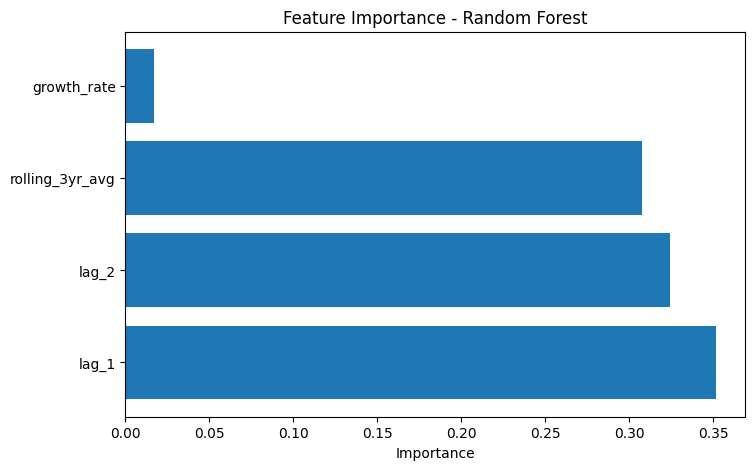

In [ ]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.show()


In [ ]:
results.to_csv("/content/model_results.csv", index=False)

### Model Training Summary

- Framed crime prediction as a time-series regression problem
- Used time-aware train-test split
- Linear Regression used as baseline model
- Random Forest captured non-linear patterns and improved accuracy
- Lag and rolling features were most influential predictors


In [ ]:
import os

os.makedirs("/content/models", exist_ok=True)


In [ ]:
import joblib

joblib.dump(rf, "/content/models/rf_model.pkl")


['/content/models/rf_model.pkl']

In [ ]:
from google.colab import files
files.download("/content/models/rf_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>